Composite Estimators using Pipeline & FeatureUnions

Introduction to Composite Estimators

One or more transformers are connected to estimators resulting into composite estimator.
Composite transformer is implemented using Pipeline
FeatureUnion is used to concatenate output of transformers to create derived feature
Pipeline make machine learning code reuseable & modular

Pipeline

Before data is fed to learning algorithm, it needs to be handled for missing values.
Different pre-processing needs to be done.
The output of preprocessor is to be subjected to next preprocessor & finally the estimator
This whole process can be automated using Pipeline

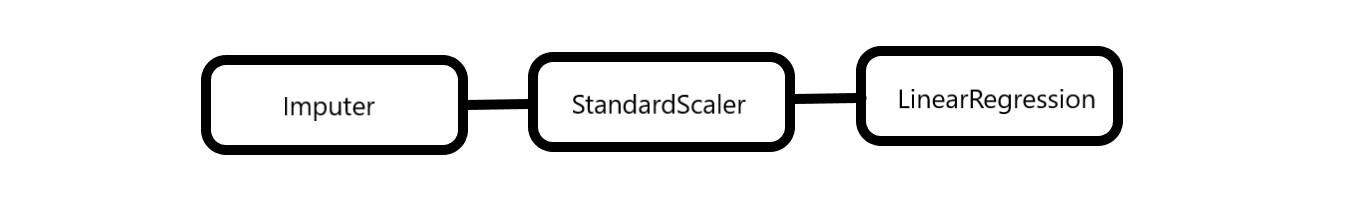

Intermediate steps .i.e transformers must implement fit & transform
The same trained pipeline can used for prediction

In [1]:
import pandas as pd

In [2]:
horror_train_data = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/horror-train.csv')

In [3]:
horror_train_data.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [4]:
horror_test_data= pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/horror-test.csv')

In [5]:
horror_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392 entries, 0 to 8391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8392 non-null   object
 1   text    8392 non-null   object
dtypes: object(2)
memory usage: 131.2+ KB


In [6]:
horror_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19579 entries, 0 to 19578
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      19579 non-null  object
 1   text    19579 non-null  object
 2   author  19579 non-null  object
dtypes: object(3)
memory usage: 459.0+ KB


In [7]:
horror_train_data = horror_train_data[['text','author']]

In [8]:
from sklearn.pipeline import make_pipeline

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [11]:
pipelines = []
for model in [LogisticRegression(), DecisionTreeClassifier(), MultinomialNB(), LinearSVC()]:
    pipeline = make_pipeline(
              CountVectorizer(stop_words='english'),
              TfidfTransformer(),
              model)
    pipelines.append(pipeline)

In [12]:
pipelines[1].steps[2]

('decisiontreeclassifier', DecisionTreeClassifier())

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
trainX,testX,trainY,testY = train_test_split(horror_train_data.text, horror_train_data.author)

In [15]:
for pipeline in pipelines:
    pipeline.fit(trainX, trainY)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [16]:
for pipeline in pipelines:
    print (pipeline.score(testX, testY))

0.7963227783452502
0.6073544433094995
0.8104187946884576
0.8053115423901941


In [17]:
horror_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8392 entries, 0 to 8391
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      8392 non-null   object
 1   text    8392 non-null   object
dtypes: object(2)
memory usage: 131.2+ KB


In [18]:
results = []
for pipeline in pipelines:
    result = pipeline.predict(horror_test_data.text)
    results.append(result)

In [19]:
results

[array(['MWS', 'EAP', 'HPL', ..., 'EAP', 'MWS', 'HPL'], dtype=object),
 array(['MWS', 'EAP', 'HPL', ..., 'HPL', 'MWS', 'EAP'], dtype=object),
 array(['MWS', 'EAP', 'HPL', ..., 'EAP', 'MWS', 'HPL'], dtype='<U3'),
 array(['MWS', 'EAP', 'EAP', ..., 'EAP', 'MWS', 'HPL'], dtype=object)]

In [20]:
pipelines[0].steps[0][1].transform(horror_test_data.text)

<8392x22167 sparse matrix of type '<class 'numpy.int64'>'
	with 88767 stored elements in Compressed Sparse Row format>

Caching transformers within a Pipeline

Storing state of transformers is also possible to prevent recomputation of transformers
When pipeline is subjected to GridSearch situations like this happens

In [21]:
from sklearn.model_selection import GridSearchCV

In [23]:
svc_pipe =  make_pipeline(
              CountVectorizer(stop_words='english'),
              TfidfTransformer(),
              LinearSVC())

In [24]:
dt_pipe = make_pipeline(
              CountVectorizer(stop_words='english'),
              TfidfTransformer(),
              DecisionTreeClassifier())

In [25]:
svc_pipe

Pipeline(steps=[('countvectorizer', CountVectorizer(stop_words='english')),
                ('tfidftransformer', TfidfTransformer()),
                ('linearsvc', LinearSVC())])

In [26]:
svc_pipe.steps

[('countvectorizer', CountVectorizer(stop_words='english')),
 ('tfidftransformer', TfidfTransformer()),
 ('linearsvc', LinearSVC())]

In [27]:
import numpy as np
params = {
    'linearsvc__C': list(np.logspace(1,20,20))
}

In [28]:
dt_pipe.steps[2]

('decisiontreeclassifier', DecisionTreeClassifier())

In [29]:
params = {
    'countvectorizer__max_features':[5000,7500,10000],
    'decisiontreeclassifier__max_depth':[100,200]
}

In [30]:
gs = GridSearchCV(dt_pipe,cv=5,param_grid=params, n_jobs=-1)

In [31]:
gs.fit(trainX,trainY)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(stop_words='english')),
                                       ('tfidftransformer', TfidfTransformer()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'countvectorizer__max_features': [5000, 7500, 10000],
                         'decisiontreeclassifier__max_depth': [100, 200]})

In [32]:
gs.best_params_

{'countvectorizer__max_features': 7500,
 'decisiontreeclassifier__max_depth': 200}

In [33]:
gs.best_score_

0.6052167033590969

Transforming target in regression

Dependent variables & independent variables should be linearly related
In case, dependent variable is not normally distribted. We can make it happen for better error.
The prediction also needs to be remapped
This entire process can be automated using TransformedTargetRegressor

In [41]:
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [42]:
boston = load_boston()

D:\Anaconda\envs\tf\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [43]:
X = boston.data

In [44]:
y = boston.target

In [45]:
regressor = LinearRegression()

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [47]:
regressor.fit(X_train, y_train)

LinearRegression()

In [48]:
print('R2 score: {0:.2f}'.format(regressor.score(X_test, y_test)))

R2 score: 0.64


In [49]:
pred = regressor.predict(X_test)

In [50]:
from sklearn.metrics import mean_absolute_error, r2_score

In [51]:
mean_absolute_error(y_pred=pred, y_true=y_test)

3.6683301481357113

Convert data from non-normal distribution to normal distribution

In [52]:
from sklearn.preprocessing import PowerTransformer,QuantileTransformer

In [53]:
pt = PowerTransformer()

In [54]:
qt = QuantileTransformer(output_distribution='normal')

In [56]:
X_tf = pt.fit_transform(X)
#OR
#X_tf = qt.fit_transform(X)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_tf, y, random_state=0)

In [58]:
regressor = LinearRegression()

In [59]:
regressor.fit(X_train, y_train)

LinearRegression()

In [60]:
print('R2 score: {0:.2f}'.format(regressor.score(X_test, y_test)))

R2 score: 0.68


In [61]:
pred = regressor.predict(X_test)

In [62]:
mean_absolute_error(y_pred=pred, y_true=y_test)

3.531343652794773

In [63]:
from sklearn.compose import TransformedTargetRegressor

In [64]:
regr = TransformedTargetRegressor(regressor=regressor,transformer=qt)

In [65]:
regr.fit(X_train, y_train)

D:\Anaconda\envs\tf\lib\site-packages\sklearn\preprocessing\_data.py:2590: UserWarning: n_quantiles (1000) is greater than the total number of samples (379). n_quantiles is set to n_samples.
  warnings.warn(


TransformedTargetRegressor(regressor=LinearRegression(),
                           transformer=QuantileTransformer(output_distribution='normal'))

In [66]:
pred = regr.predict(X_test)

In [67]:
mean_absolute_error(y_pred=pred, y_true=y_test)

3.547817614764232

In [68]:
r2_score(y_pred=pred, y_true=y_test)

0.6699438046432571

Hyper-parameters of TransformedTargetRegressor

regressor - initialized model
transformer - which supports transform & inverse_transform functions
function - to convert target
inverse_function - to convert back predicted target in original data scale

FeatureUnion

It combines several transformer objects into one transformer
Transformers are executed in parallel
During fitting, each of these are fit parallelly
During transform, output is concatenated parallely

Predicting employee exit - The Pipeline & FeatureUnion Way

In [69]:
emp_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/HR_comma_sep.csv.txt')

In [70]:
emp_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [71]:
emp_data.rename(columns={'sales':'dept'}, inplace=True)

In [72]:
num_cols = ['number_project','average_montly_hours','time_spend_company']

In [73]:
bin_cols = ['Work_accident','promotion_last_5years']

In [74]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder,LabelEncoder, LabelBinarizer, MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [76]:
class ItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self,key):
        self.key = key
        
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X,Y=None):
        return X[self.key]

In [77]:
class MyLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, x, y=0):
        self.encoder.fit(x)
        return self
    def transform(self, x, y=0):
        return self.encoder.transform(x)

In [78]:
pipeline_dept = Pipeline([
    ('selector', ItemSelector('dept')),
    ('lb', MyLabelBinarizer()),
])

In [79]:
pipeline_dept.fit_transform(emp_data)

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [80]:
class MultiItemSelector(BaseEstimator, TransformerMixin):
    def __init__(self,keys):
        self.keys = keys
        
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X,Y=None):
        return X[self.keys]

In [81]:
class SalaryMapper(BaseEstimator, TransformerMixin):
    
    def fit(self,X,Y=None):
        return self
    
    def transform(self,X,Y=None):
        db = {'low':1,'medium':2,'high':3}
        print (type(X))
        r = X.str.strip().replace(db)
        return r.values.reshape(-1,1)

In [82]:
pipeline_salary = Pipeline([
    ('selector',ItemSelector('salary')),
    ('sm',SalaryMapper())
])

In [83]:
pipeline_numbers = Pipeline([
    ('selector',MultiItemSelector(num_cols)),
    ('scaling', MinMaxScaler())
])

In [84]:
pipeline_bin = Pipeline([
    ('selector',MultiItemSelector(bin_cols))
])

In [85]:
fu = FeatureUnion([
    ('dept_pipe',pipeline_dept),
    ('salary_pipe',pipeline_salary),
    ('numbers_pipe',pipeline_numbers),
    ('bin_pipe',pipeline_bin)
])

In [86]:
pipeline = Pipeline([
    ('union',fu),
    #('feature_selector',SelectKBest(k=15)),
    ('classifier',RandomForestClassifier(n_estimators=10))
])

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
trainX,testX, trainY,testY = train_test_split(emp_data.drop('left',axis=1), emp_data.left)

In [89]:
pipeline.fit(trainX,trainY)

<class 'pandas.core.series.Series'>


Pipeline(steps=[('union',
                 FeatureUnion(transformer_list=[('dept_pipe',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='dept')),
                                                                 ('lb',
                                                                  <__main__.MyLabelBinarizer object at 0x0000012B5B023970>)])),
                                                ('salary_pipe',
                                                 Pipeline(steps=[('selector',
                                                                  ItemSelector(key='salary')),
                                                                 ('sm',
                                                                  SalaryMapper())])),
                                                ('numbers_pipe',
                                                 Pipeline(steps=[('selector',
   

In [90]:
pipeline.predict(testX)

<class 'pandas.core.series.Series'>


array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [91]:
pipeline.score(testX,testY)

<class 'pandas.core.series.Series'>


0.9658666666666667

ColumnTransformer 

Datasets consist of hetrogenous types of columns
An easy technique to map column to pipeline

In [92]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [93]:
titanic_data = pd.read_csv('https://raw.githubusercontent.com/zekelabs/data-science-complete-tutorial/master/Data/titanic-train.csv.txt', index_col='PassengerId')

In [94]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [95]:
num_cols = ['Age','Fare']
cat_cols = ['Embarked','Sex','Pclass']

In [96]:
pipeline_num = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaling',StandardScaler())
])

In [97]:
pipeline_cat = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])

In [98]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', pipeline_num, num_cols),
        ('cat', pipeline_cat, cat_cols)])

In [99]:
pipeline = Pipeline(steps=[('preprocessor',preprocessor),
                ('classifier',RandomForestClassifier(n_estimators=10))])

In [100]:
X = titanic_data.drop('Survived',axis=1)

In [101]:
Y = titanic_data.Survived

In [102]:
trainX,testX,trainY,testY = train_test_split(X,Y)

In [103]:
pipeline.fit(trainX,trainY)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Age', 'Fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('encoding',
                                                                   OneHotEn

In [104]:
pipeline.score(testX,testY)

0.8295964125560538

GridSearch for pipelines

Pipelines consist of combination of transformers & estimators
Both transformers & estimators are configured hyper-parameters as a fine tuning process

In [105]:
pipeline.steps

[('preprocessor',
  ColumnTransformer(transformers=[('num',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(strategy='median')),
                                                   ('scaling',
                                                    StandardScaler())]),
                                   ['Age', 'Fare']),
                                  ('cat',
                                   Pipeline(steps=[('imputer',
                                                    SimpleImputer(fill_value='missing',
                                                                  strategy='constant')),
                                                   ('encoding',
                                                    OneHotEncoder(handle_unknown='ignore'))]),
                                   ['Embarked', 'Sex', 'Pclass'])])),
 ('classifier', RandomForestClassifier(n_estimators=10))]

In [106]:
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'classifier__n_estimators': [10,15,20],
}

In [107]:
from sklearn.model_selection import GridSearchCV

In [110]:
grid_search = GridSearchCV(pipeline, param_grid, cv=5, iid=False)
grid_search.fit(trainX,trainY)

TypeError: __init__() got an unexpected keyword argument 'iid'